#  **Pandas Assingment-4**

(Based on IPL matches and deliveries dataset)


Matches- <a>https://www.kaggle.com/nowke9/ipldata#matches.csv</a>


Deliveries- <a>https://www.kaggle.com/nowke9/ipldata#deliveries.csv<a>

In [0]:
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()
matches = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))

Saving matches.csv to matches.csv


In [0]:
uploaded = files.upload()
delivery = pd.read_csv(io.StringIO(uploaded['deliveries.csv'].decode('utf-8')))

Saving deliveries.csv to deliveries.csv


In [0]:
mega = matches.merge(delivery,left_on='id',right_on='match_id')

In [0]:
#  Q1.- Make a pivot table of top 10 bowlers(in terms of wickets) with over(1-20) showing no. of wickets.  [Dificult-]

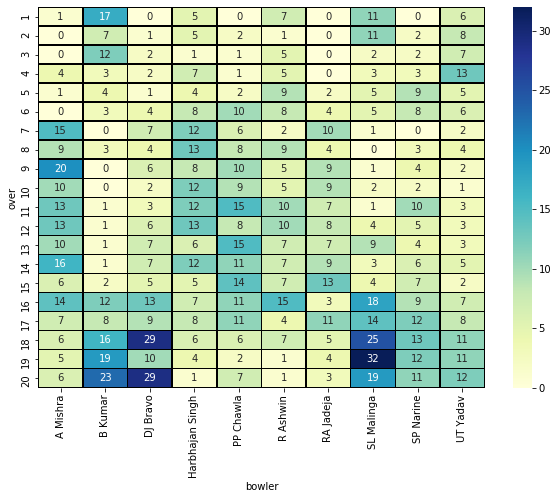

In [0]:
out = ['caught', 'bowled', 'lbw', 'caught and bowled','stumped']
p = mega[mega['dismissal_kind'].isin(out)]['bowler'].value_counts().head(10).index
final = mega[(mega['bowler'].isin(p))&mega['dismissal_kind'].isin(out)]
x = final.pivot_table(index='over',columns='bowler',values='dismissal_kind',aggfunc='count')
x.fillna(0,inplace=True)
plt.figure(figsize=(10,7))
sns.heatmap(x,cmap='YlGnBu',annot=True,linecolor='black',linewidths=0.5)

In [0]:
# Q2.- Make a function for batting profile of any batsman:-                                              [Medium+]

Ex- 

V Kohli:

Innings:  

Total Runs: 

No. of MOM(Man of the match):

No. of boundries:

In [0]:
def stats(player):
  innings = delivery[delivery['batsman']==player]['inning'].value_counts().sum()
  total_runs = delivery[delivery['batsman']==player]['batsman_runs'].sum()
  mom = matches[matches['player_of_match']==player]['player_of_match'].value_counts()[0]
  x = [4,6]
  nob = delivery[(delivery['batsman']==player)&(delivery['batsman_runs'].isin(x))]['total_runs'].value_counts().sum()
  print(f'\t{player}\nInnings : {innings}\nTotal Runs : {total_runs}\nNo. of MOM(Man of the match) : {mom}\nNo. of boundries : {nob}')

name = input('Enter player name : ')
stats(name)

Enter player name : JJ Bumrah
	JJ Bumrah
Innings : 39
Total Runs : 37
No. of MOM(Man of the match) : 5
No. of boundries : 3


In [0]:
# Q3.- Write a function to return top-4 batsman at a venue. Take venue as input.

In [0]:
def check(v):
  #v = 'Maharashtra Cricket Association Stadium'
  print(mega[mega['venue']==v].groupby('batsman').sum()['batsman_runs'].sort_values(ascending=False).head(4))

v = input('Enter Venue : ')
check(v)

Enter Venue : Rajiv Gandhi International Stadium, Uppal
batsman
S Dhawan         1385
DA Warner        1169
KS Williamson     470
RG Sharma         440
Name: batsman_runs, dtype: int64


In [0]:
# Q4.- No. of matches per season played in Mumbai.

In [0]:
matches[matches['city']=='Mumbai']['season'].value_counts()

2011    16
2010    13
2015    11
2008    10
2018     9
2017     8
2013     8
2012     8
2019     7
2014     7
2016     4
Name: season, dtype: int64

In [0]:
# Q5. - Top-3 Player in terms of most no. of catches.

In [0]:
delivery[delivery['dismissal_kind']=='caught']['fielder'].value_counts().head(3)

KD Karthik    109
SK Raina       99
MS Dhoni       98
Name: fielder, dtype: int64